In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

In [2]:
inpatient=pd.read_csv("G:/Data Science Recorded Lectures/case studies/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
outpatient=pd.read_csv("G:/Data Science Recorded Lectures/case studies/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [3]:
inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [4]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [5]:
inpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.000000,110092.000000,250007.000000,380075.00000,670077.0000
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.000000,27261.000000,44309.000000,72901.00000,99835.0000
Total Discharges,163065.0,42.776304,51.104042,11.000000,17.000000,27.000000,49.00000,3383.0000
Average Covered Charges,163065.0,36133.958434,35065.365905,2459.400000,15947.166670,25245.823530,43232.59259,929118.9091
Average Total Payments,163065.0,9707.477867,7664.642652,2673.000000,5234.500000,7214.100000,11286.40000,156158.1818
Average Medicare Payments,163065.0,8494.495174,7309.467247,1148.909091,4192.354839,6158.465116,10056.88235,154620.8182


In [6]:
outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [7]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [8]:
outpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.921747,152729.927698,10001.00000,140043.000000,260091.000000,390101.000000,670061.000000
Provider Zip Code,43372.0,49041.022434,27497.899751,1040.00000,28645.000000,46342.000000,73101.000000,99801.000000
Outpatient Services,43372.0,587.980955,3280.397168,11.00000,42.000000,128.000000,347.000000,219042.000000
Average Estimated Submitted Charges,43372.0,1473.994047,1837.530791,12.64375,284.610498,709.995188,2102.121346,32105.636360
Average Total Payments,43372.0,265.425586,261.260146,7.30500,74.627714,139.298570,394.211316,2062.470526


### Part1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

#### Part1: A: Highest Cost Variation

##### For inpatient

In [11]:
a=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
a.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [12]:
amax=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop=True)

In [13]:
a1=amax.copy()
a1['Variation']=amax['Average Medicare Payments']-amin['Average Medicare Payments']
del a1['Average Medicare Payments']
a1.loc[a1.groupby(['DRG Definition'])['Variation'].idxmax()].head()

,DRG Definition,Provider State,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,9972.780745


In [14]:
#For outpatient
a=outpatient[['APC','Provider State','Average Total Payments']]
a.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [15]:
amax=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

In [16]:
a1=amax.copy()
a1['Variation']=amax['Average Total Payments']-amin['Average Total Payments']
del a1['Average Total Payments']
a1.loc[a1.groupby(['APC'])['Variation'].idxmax()].head()

,APC,Provider State,Variation
20,0012 - Level I Debridement & Destruction,MI,20.593261
51,0013 - Level II Debridement & Destruction,CA,47.025556
101,0015 - Level III Debridement & Destruction,CA,83.536505
175,0019 - Level I Excision/ Biopsy,NY,180.010667
194,0020 - Level II Excision/ Biopsy,CA,296.625625


#### Part1: B: Highest-Cost Claims by Provider

In [17]:
#For inpatient
b=inpatient[['DRG Definition','Provider Id','Average Medicare Payments']]
b.head()

,DRG Definition,Provider Id,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,4851.444444


In [19]:
bmax=b.loc[b.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider Id,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,13710.23529


In [20]:
#For outpatient
b=outpatient[['APC','Provider Id','Average Total Payments']]
b.head()

,APC,Provider Id,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,21.910435
1,0012 - Level I Debridement & Destruction,20024,36.623853
2,0012 - Level I Debridement & Destruction,30064,14.541841
3,0012 - Level I Debridement & Destruction,30088,23.736000
4,0012 - Level I Debridement & Destruction,30111,16.569091


In [21]:
bmax=b.loc[b.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider Id,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,36.623853
424,0013 - Level II Debridement & Destruction,50334,85.930000
1874,0015 - Level III Debridement & Destruction,50153,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,808.850000


#### Part1: C: Highest-Cost Claims by Region

In [22]:
#For inpatient
c=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
c.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [23]:
cmax=c.loc[c.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider State,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,MD,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529


In [24]:
#For outpatient
c=outpatient[['APC','Provider State','Average Total Payments']]
c.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [25]:
cmax=c.loc[c.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AK,36.623853
51,0013 - Level II Debridement & Destruction,CA,85.930000
101,0015 - Level III Debridement & Destruction,CA,142.186505
150,0019 - Level I Excision/ Biopsy,CA,470.720000
194,0020 - Level II Excision/ Biopsy,CA,808.850000


#### Part1: D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements

In [29]:
#For inpatient
d=inpatient[['DRG Definition','Provider State','Total Discharges','Average Total Payments',
             'Average Medicare Payments']]
d.head()

,DRG Definition,Provider State,Total Discharges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,5658.333333,4851.444444


In [30]:
#DPC=Difference between Average Total Payments and Average Medicare Payments per discharge
d['DPC']=(d['Average Total Payments']-d['Average Medicare Payments'])/d['Total Discharges']
d.drop(['Total Discharges','Average Total Payments','Average Medicare Payments'],axis=1,inplace=True)
dmax=d.loc[d.groupby(['DRG Definition','Provider State'])['DPC'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['DRG Definition'])['DPC'].idxmax()].head()

,DRG Definition,Provider State,DPC
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,IL,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,IN,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,IL,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HI,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NJ,437.876033


In [31]:
#For outpatient

In [32]:
d=outpatient[['APC','Provider State','Outpatient Services',
              'Average  Estimated Submitted Charges','Average Total Payments']]
d.head()

,APC,Provider State,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,AK,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,AZ,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,AZ,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,AZ,22,152.045455,16.569091


In [33]:
#DPO=Difference between Average Total Payments and Average Estimated Submitted Charges per outservice
d['DPO']=(d['Average  Estimated Submitted Charges']-d['Average Total Payments'])/d['Outpatient Services']
d.drop(['Outpatient Services','Average Total Payments','Average  Estimated Submitted Charges'],axis=1,inplace=True)
dmax=d.loc[d.groupby(['APC','Provider State'])['DPO'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['APC'])['DPO'].idxmax()].head()

,APC,Provider State,DPO
27,0012 - Level I Debridement & Destruction,NE,55.162667
48,0013 - Level II Debridement & Destruction,AL,398.107692
118,0015 - Level III Debridement & Destruction,MI,233.392562
150,0019 - Level I Excision/ Biopsy,CA,2172.817083
234,0020 - Level II Excision/ Biopsy,VA,1350.947190


#### Part2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions

#### Part2: A: Providers Least Like Others

In [34]:
#For inpatient
a=inpatient[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


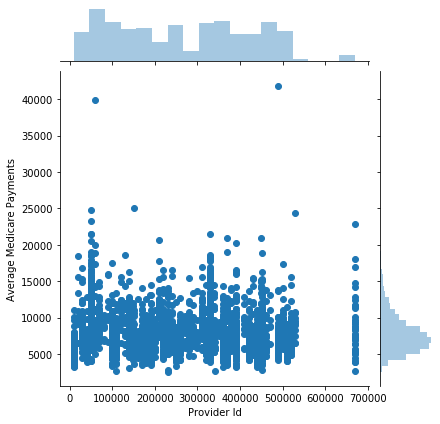

In [35]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a)

In [36]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
a['Predicted']=model.predict(a['Provider Id'].values.reshape(-1,1))
a['Residual']=abs(a['Predicted']-a['Average Medicare Payments'])

In [38]:
#Details Concerning Required Providers
a.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Medicare Payments,Predicted,Residual
3143,490142,41836.888890,7483.163626,34353.725264
540,60096,39943.173080,8420.791989,31522.381091
3295,530015,24350.493057,7396.228611,16954.264446


In [39]:
#For outpatient
a=outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Total Payments
0,10001,285.699426
1,10005,254.564837
2,10006,221.871666
3,10007,251.371890
4,10008,207.481575


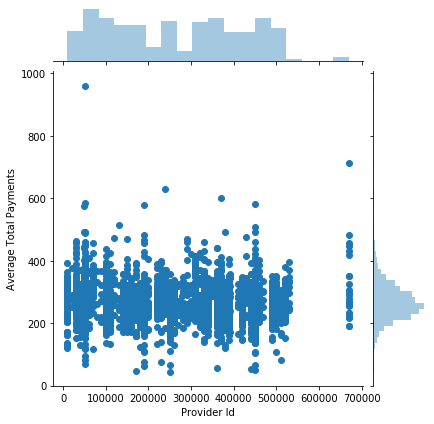

In [40]:
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a)

In [41]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Total Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
a['Predicted']=model.predict(a['Provider Id'].values.reshape(-1,1))
a['Residual']=abs(a['Predicted']-a['Average Total Payments'])

In [43]:
#Details Concerning Required Providers
a.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Total Payments,Predicted,Residual
432,50714,960.595632,275.415810,685.179823
3134,670061,712.396480,252.954963,459.441517
1474,240069,629.085289,268.548781,360.536508


#### Part2: B: Regions Least Like Others

In [44]:
#For inpatient
b=inpatient[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()
b['State_col']=b.index
b.head()

,Provider State,Average Medicare Payments,State_col
0,AK,12958.973677,0
1,AL,6418.011329,1
2,AR,6919.725054,2
3,AZ,8825.721445,3
4,CA,11494.385763,4


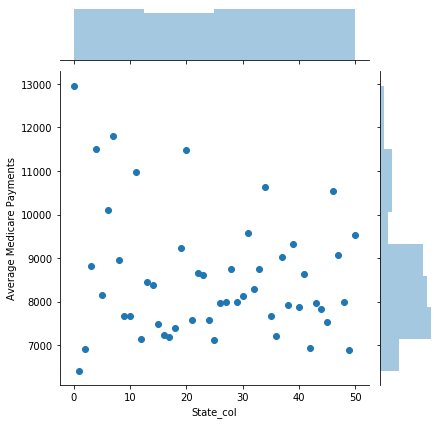

In [45]:
sns.jointplot(x='State_col', y='Average Medicare Payments', data=b)

In [46]:
model = LinearRegression()
model.fit(b['State_col'].values.reshape(-1,1),b['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
b['Predicted']=model.predict(b['State_col'].values.reshape(-1,1))
b['Residual']=abs(b['Predicted']-b['Average Medicare Payments'])

In [48]:
#Details Concerning Required States
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Medicare Payments,State_col,Predicted,Residual
0,AK,12958.973677,0,8960.607913,3998.365764
7,DC,11811.972137,7,8843.385320,2968.586816
20,MD,11480.126155,20,8625.686221,2854.439934


In [49]:
#For outpatients
b=outpatient[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()
b['State_col']=b.index

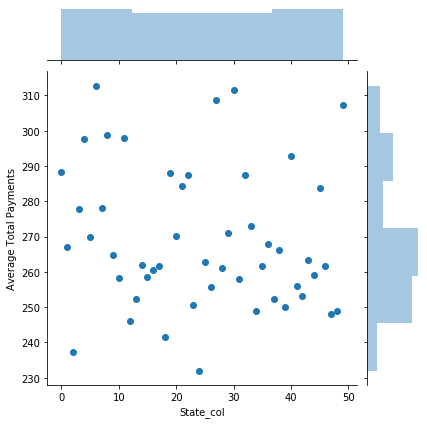

In [50]:
sns.jointplot(x='State_col', y='Average Total Payments', data=b)

In [51]:
model = LinearRegression()
model.fit(b['State_col'].values.reshape(-1,1), b['Average Total Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
b['Predicted']=model.predict(b['State_col'].values.reshape(-1,1))
b['Residual']=abs(b['Predicted']-b['Average Total Payments'])

In [53]:
#Details Concerning Required States
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Total Payments,State_col,Predicted,Residual
30,NJ,311.496332,30,268.030556,43.465776
49,WY,307.213348,49,264.300992,42.912357
6,CT,312.802783,6,272.741585,40.061198


#### Part3: Identify 10000 Medicare patients who are involved in anomalous activities.

In [54]:
history=pd.read_csv("G:/Data Science Recorded Lectures/case studies/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Patient_history_samp.csv")
history.head()

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [55]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [56]:
history.describe()

,id
count,5.000000e+05
mean,5.001562e+08
std,2.884206e+08
min,7.561000e+03
25%,2.505402e+08
50%,5.001085e+08
75%,7.495556e+08
max,9.999957e+08


In [57]:
trans=pd.read_csv("G:/Data Science Recorded Lectures/case studies/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Transaction_coo.csv")
trans.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [58]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
id                1514809 non-null int64
global_proc_id    1514809 non-null int64
count             1514809 non-null int64
dtypes: int64(3)
memory usage: 34.7 MB


In [59]:
trans.describe()

,id,global_proc_id,count
count,1.514809e+06,1.514809e+06,1514809.0
mean,5.000708e+08,3.847588e+01,1.0
std,2.883678e+08,3.123966e+01,0.0
min,7.561000e+03,1.000000e+00,1.0
25%,2.504427e+08,2.200000e+01,1.0
50%,4.999363e+08,2.600000e+01,1.0
75%,7.493563e+08,4.200000e+01,1.0
max,9.999957e+08,1.300000e+02,1.0


In [60]:
#Fixing the null values; replacing them with mode

In [61]:
history.age=history.age.fillna(history.age.mode()[0])
history.income=history.income.fillna(history.income.mode()[0])

In [62]:
trans=trans[['id','count']].groupby('id').sum()

In [63]:
history.set_index('id',inplace=True)

In [64]:
#Combining transactional information, trans and history data set, to form "x" which will form base table

In [65]:
x=pd.concat([trans,history],join='inner',axis=1)

In [66]:
x.head()

,count,age,gender,income
id,,,,
7561,2,65-74,M,48000+
7619,2,<65,F,48000+
10479,4,65-74,F,<16000
13515,2,75-84,M,<16000
15213,6,85+,M,32000-47999


In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 7561 to 999995713
Data columns (total 4 columns):
count     500000 non-null int64
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
dtypes: int64(1), object(3)
memory usage: 19.1+ MB


In [68]:
x.describe()

,count
count,500000.000000
mean,2.999536
std,1.416457
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [69]:
#Creating dummy variables 
columns=['age','gender','income']
for i in columns:
    dummy = pd.get_dummies(x[i], prefix=i)
    x = pd.concat([x, dummy], axis=1)
    x.drop(i,axis=1,inplace=True)

In [70]:
xs=StandardScaler().fit_transform(x)

In [71]:
x2=pd.DataFrame(xs)
x2.columns=x.columns
x2.index=x.index

In [72]:
x2.head()

,count,age_65-74,age_75-84,age_85+,age_<65,gender_F,gender_M,income_16000-23999,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,,,,
7561,-0.705660,1.119680,-0.589644,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,1.795304,-0.523474
7619,-0.705660,-0.893112,-0.589644,-0.385122,2.216394,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,1.795304,-0.523474
10479,0.706315,1.119680,-0.589644,-0.385122,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
13515,-0.705660,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
15213,2.118289,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,2.052759,-0.557009,-0.523474


In [73]:
xx=LocalOutlierFactor(n_neighbors=50,n_jobs=-1,contamination=0.002)

In [74]:
xa=xx.fit_predict(x2)

In [75]:
label=pd.DataFrame(xa)
label.index=x2.index
label.columns=['label']

In [76]:
label.label.value_counts()

 1    499011
-1       989
Name: label, dtype: int64

In [77]:
xo=x2[label.label==-1]

In [78]:
#Required list of people involved in malicious activities
xo

,count,age_65-74,age_75-84,age_85+,age_<65,gender_F,gender_M,income_16000-23999,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,,,,
1552051,4.236251,-0.893112,-0.589644,2.596578,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2385395,4.942239,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2462212,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2673778,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2777478,3.530264,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
3451946,3.530264,-0.893112,-0.589644,-0.385122,2.216394,0.906319,-0.906319,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
3967912,3.530264,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,2.052759,-0.557009,-0.523474
4456190,3.530264,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
5848900,3.530264,-0.893112,-0.589644,-0.385122,2.216394,-1.103364,1.103364,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
